In [16]:
# %matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

Load and Format File 

In [17]:

raw_data = np.load(r"C:\Users\quant\SynologyDrive\09 Data\Fridge Data\Qubit\20240521_DR4_5Q4C_0430#7\03 zline_ramsey_1micro\20240601_1729_target_q4_crosstalk_q3_ramsey_zlinecrosstalk_0.01.npz", allow_pickle=True)# ["arr_0"].item()
other_info = {}
for k, v in raw_data.items():
    print(k, v.shape)
    if k in ["paras","setting"]:
        other_info[k]=v.item()

for k, v in other_info.items():
    print(k)

d_z_target_amp = other_info["paras"]["d_z_target_amp"]
d_z_crosstalk_amp = other_info["paras"]["d_z_crosstalk_amp"]

# Create a 2D numpy array (example data)
data = raw_data["q4_ro"][0]

# d_z_target_amp = d_z_target_amp
# d_z_crosstalk_amp = d_z_crosstalk_amp[15:]
# data = data[:, 15:]

print(data.shape, d_z_target_amp.shape, d_z_crosstalk_amp.shape)


q4_ro (2, 1000, 1001)
setting ()
paras ()
setting
paras
(1000, 1001) (1000,) (1001,)


In [18]:
from qcat.zline_crosstalk.ramsey_2dfft import analysis_crosstalk_value

analysis_crosstalk_value(d_z_crosstalk_amp, d_z_target_amp, data.transpose())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (3001, 3000)
length: 3001, delta:0.0005999999999999339
length: 3000, delta:5.999999999999062e-06
Maximum value: 0.31149373398543534
f_z_target: -21.10407641897378
f_z_crosstalk: 51166.666666674675
k space: -2424.4921052632703
crosstalk: 0.0004124575195889995


(0.0004124575195889995,
 [array([-833.05564812, -832.50027769, -831.94490725, ...,  831.94490725,
          832.50027769,  833.05564812]),
  array([-83333.33333335, -83277.77777779, -83222.22222224, ...,
          83166.66666668,  83222.22222224,  83277.77777779])],
 array([[0.00116713, 0.00051361, 0.00048   , ..., 0.00121188, 0.00179942,
         0.00190172],
        [0.00193413, 0.00134669, 0.00074507, ..., 0.00223559, 0.00294284,
         0.00261673],
        [0.00190035, 0.00164044, 0.00048443, ..., 0.00317893, 0.00300228,
         0.00200899],
        ...,
        [0.00190035, 0.00200899, 0.00300228, ..., 0.00060251, 0.00048443,
         0.00164044],
        [0.00193413, 0.00261673, 0.00294284, ..., 0.00069761, 0.00074507,
         0.00134669],
        [0.00116713, 0.00190172, 0.00179942, ..., 0.00107934, 0.00048   ,
         0.00051361]]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (3001, 3000)
length: 3001, delta:0.0005999999999999339
length: 3000, delta:5.999999999999062e-06
Maximum value: 0.31149373398543534
f_z_target: -21.10407641897378
f_z_crosstalk: 51166.666666674675
k space: -2424.4921052632703
crosstalk: 0.0004124575195889995


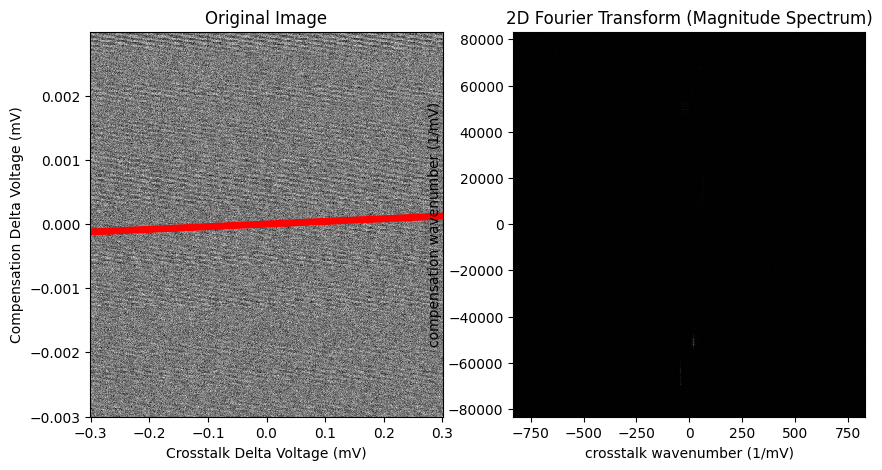

In [19]:

from qcat.visualization.zline_crosstalk import plot_analysis
plot_analysis(d_z_crosstalk_amp, d_z_target_amp, data.transpose())

plt.show()

In [20]:
crosstalk_matrix = [
    [1., -0.007400970564034268, 0.010415087536721896, 0.012029863644126419, 0.012368349658446206],
    [-0.023928106398805868, 1., 0.016610996569762837, 0.015786691698146973, 0.01443740180941646],
    [-0.017303387280268364, -0.019667825293721183, 1., 0.020312672024662866, 0.011956655206285012],
    [-0.019990248659192026, -0.016587653142733808, -0.019786266530016597, 1., 0.028125814973979476],
    [-0.016485464803359655, -0.010903771995922922, -0.010124931139071286, 0.004398533822059109, 1.],
]
cancel_matrix = np.linalg.inv(crosstalk_matrix)
print(cancel_matrix)


[[ 0.99954093  0.00685605 -0.01088031 -0.01185879 -0.01199802]
 [ 0.02307034  0.99941776 -0.01729353 -0.01564188 -0.01406762]
 [ 0.01713722  0.01930098  0.99897034 -0.02075049 -0.01185133]
 [ 0.02022993  0.01678385  0.01898975  0.99923273 -0.02882381]
 [ 0.01681398  0.01113205  0.00966305 -0.00497131  0.99965561]]
